In [4]:
%load_ext autoreload
%autoreload 2

## Load dependencies

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from nnAudio import Spectrogram

import beatbrain
from beatbrain import get_default_config, Config
from beatbrain.utils.visualization import show_heatmap, show_audio, show_spec

## Visualize spectrogram for one audio sample

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Load audio

In [12]:
audio_config = get_default_config().hparams.audio
audio, sr = librosa.load("../data/fma/audio/train/000/000002.mp3", **audio_config)
audio_tensor = torch.tensor(audio, dtype=torch.float32, device=device)
show_audio(audio, rate=sr)

c:\users\krish\miniconda3\envs\ai\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


### Initialize Mel filter bank

In [13]:
spec_config = get_default_config().hparams.spec
print(spec_config)
audio_to_mel = Spectrogram.MelSpectrogram(n_fft=spec_config.n_fft, hop_length=spec_config.hop_length, n_mels=spec_config.n_mels, device=device)

{'flip': True, 'hop_length': 256, 'n_fft': 4096, 'n_frames': 640, 'n_mels': 512, 'top_db': 80, 'truncate': True}
STFT filter created, time used = 0.0180 seconds
Mel filter created, time used = 0.0180 seconds


### Convert audio to mel spectrogram and display

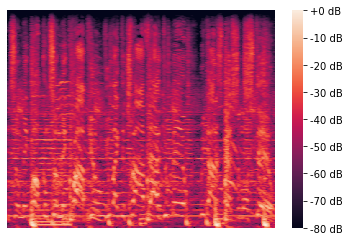

In [14]:
spec_tensor = audio_to_mel(audio_tensor[:(sr * 5) - 1])
spec = spec_tensor[0].cpu().numpy()
show_heatmap(spec)

## PyTorch Dataset for Audio

In [113]:
from beatbrain.datasets import AudioClipDataset

dataset = AudioClipDataset("../data/fma/audio/test")
dataset[len(dataset) - 1].device

Found 12516.0 seconds of audio


device(type='cpu')